<a href="https://colab.research.google.com/github/rahulyadav0628/ds_-Rahul-Yadav-/blob/main/data_science_assignment_(rahul_yadav).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import OneHotEncoder

In [14]:
# Load the datasets. Replace the paths with the actual paths after uploading your files to Colab.
# Example: historical = pd.read_csv('/content/historical_data.csv')
# Example: fear_greed = pd.read_csv('/content/fear_greed_index.csv')

# Uncomment the following lines and replace with your file paths after uploading:
historical = pd.read_csv('/content/historical_data.csv')
fear_greed = pd.read_csv('/content/fear_greed_index.csv')

In [15]:
historical.sample(5)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
59960,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,TAO,339.000000,5.624,1906.54,BUY,24-04-2025 04:25,85.0140,Open Long,0.000000,0xef41f83ec47f636d139104221f9c6a01ed0022596330...,88433437506,False,0.190653,7.450000e+14,1.750000e+12
44776,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,@8,0.030061,525.000,15.78,BUY,27-08-2024 05:24,868056.0492,Buy,0.000000,0x3d1b104441ebe11fc4a7041050733501630036fb3910...,35663442797,True,0.183720,1.750000e+14,1.720000e+12
126974,0x47add9a56df66b524d5e2c1993a43cde53b6ed85,SUI,3.150000,238.000,749.70,BUY,24-02-2025 19:52,418.7000,Open Long,0.000000,0x8fa1f3444ea537e49208041e614aa60202200052180a...,73990387579,False,0.071971,8.290000e+14,1.740000e+12
124446,0x47add9a56df66b524d5e2c1993a43cde53b6ed85,AI,0.742130,834.800,619.53,BUY,03-01-2025 11:27,-834.8000,Close Short,4.649836,0x369e62f241e681ed353e041a88200c0000e611247ccd...,60359134124,True,0.208161,1.140000e+14,1.740000e+12
175411,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,HYPE,16.087000,62.130,999.49,SELL,04-03-2025 16:07,19686.7400,Close Long,-4.137858,0x1929ead83efb3a1f5c24041ee2fcb40201c200479177...,77000105958,True,0.299845,8.380000e+14,1.740000e+12


In [16]:
fear_greed.sample(5)


,timestamp,value,classification,date
1489,1646371800,33,Fear,2022-03-04
351,1548048600,30,Fear,2019-01-21
1105,1613194200,92,Extreme Greed,2021-02-13
1561,1652592600,10,Extreme Fear,2022-05-15
2103,1699421400,66,Greed,2023-11-08


In [17]:
print('Historical Data Overview')
print('Shape: ', historical.shape)
print('\nColumn Names: \n',historical.columns.tolist())
print('\nData Types: \n',historical.dtypes)
print('\nMissing Values in Percentage: \n',historical.isnull().mean()*100)

print('\n" + "="*50 + "\n')

print('Fear-Greed Index Data Overview')
print('Shape:', fear_greed.shape)
print('\nColumn Names:\n', fear_greed.columns.tolist())
print('\nData Types:\n', fear_greed.dtypes)
print('\nMissing Values:\n', fear_greed.isnull().sum())

Historical Data Overview
Shape:  (211224, 16)

Column Names: 
 ['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side', 'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL', 'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID', 'Timestamp']

Data Types: 
 Account              object
Coin                 object
Execution Price     float64
Size Tokens         float64
Size USD            float64
Side                 object
Timestamp IST        object
Start Position      float64
Direction            object
Closed PnL          float64
Transaction Hash     object
Order ID              int64
Crossed                bool
Fee                 float64
Trade ID            float64
Timestamp           float64
dtype: object

Missing Values in Percentage: 
 Account             0.0
Coin                0.0
Execution Price     0.0
Size Tokens         0.0
Size USD            0.0
Side                0.0
Timestamp IST       0.0
Start Position      0.0
Direction           0.0


### Converting timestamp to date

In [18]:
historical['date'] = pd.to_datetime(historical['Timestamp'], unit = 'ms').dt.date
historical.columns

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp', 'date'],
      dtype='object')

In [19]:
historical_new = historical[['Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side','Start Position',
                              'Direction', 'Closed PnL', 'Crossed', 'Fee', 'date']]
historical_new.head()

,Coin,Execution Price,Size Tokens,Size USD,Side,Start Position,Direction,Closed PnL,Crossed,Fee,date
0,@107,7.9769,986.87,7872.16,BUY,0.000000,Buy,0.0,True,0.345404,2024-10-27
1,@107,7.9800,16.00,127.68,BUY,986.524596,Buy,0.0,True,0.005600,2024-10-27
2,@107,7.9855,144.09,1150.63,BUY,1002.518996,Buy,0.0,True,0.050431,2024-10-27
3,@107,7.9874,142.98,1142.04,BUY,1146.558564,Buy,0.0,True,0.050043,2024-10-27
4,@107,7.9894,8.73,69.75,BUY,1289.488521,Buy,0.0,True,0.003055,2024-10-27


I deleted the ‘Timestamp’ column in the Fear-Greed dataset because the ‘date’ column was already present and sufficient for merging and time-based analysis, making the timestamp redundant.

In [20]:
fear_greed_new = fear_greed.drop(['timestamp','value'], axis = 1)
fear_greed_new.head()

,classification,date
0,Fear,2018-02-01
1,Extreme Fear,2018-02-02
2,Fear,2018-02-03
3,Extreme Fear,2018-02-04
4,Extreme Fear,2018-02-05


In [21]:
print('Data Type of historical_new Data: ', historical_new.dtypes)
print('\nData Type of fear_greed_new Data: \n',fear_greed_new.dtypes)

Data Type of historical_new Data:  Coin                object
Execution Price    float64
Size Tokens        float64
Size USD           float64
Side                object
Start Position     float64
Direction           object
Closed PnL         float64
Crossed               bool
Fee                float64
date                object
dtype: object

Data Type of fear_greed_new Data: 
 classification    object
date              object
dtype: object


In [22]:
historical_new.loc[:, 'date'] = pd.to_datetime(historical_new['date']).dt.date
fear_greed_new.loc[:, 'date'] = pd.to_datetime(fear_greed_new['date']).dt.date

The ‘date’ column had an object dtype, so I converted it to a proper datetime format using pd.to_datetime(...).dt.date to ensure consistency and enable accurate merging between datasets.

In [23]:
# Checking shape of both datasets
historical_new.shape, fear_greed_new.shape

((211224, 11), (2644, 2))

Merge datasets on 'date'

In [24]:
merged = pd.merge(historical_new, fear_greed_new, on='date', how='inner')
merged.head()

,Coin,Execution Price,Size Tokens,Size USD,Side,Start Position,Direction,Closed PnL,Crossed,Fee,date,classification
0,@107,7.9769,986.87,7872.16,BUY,0.000000,Buy,0.0,True,0.345404,2024-10-27,Greed
1,@107,7.9800,16.00,127.68,BUY,986.524596,Buy,0.0,True,0.005600,2024-10-27,Greed
2,@107,7.9855,144.09,1150.63,BUY,1002.518996,Buy,0.0,True,0.050431,2024-10-27,Greed
3,@107,7.9874,142.98,1142.04,BUY,1146.558564,Buy,0.0,True,0.050043,2024-10-27,Greed
4,@107,7.9894,8.73,69.75,BUY,1289.488521,Buy,0.0,True,0.003055,2024-10-27,Greed


In [25]:
print('Shape: ',merged.shape)

Shape:  (184263, 12)


In [26]:
print(type(merged))
print(merged.columns)

<class 'pandas.core.frame.DataFrame'>
Index(['Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Start Position', 'Direction', 'Closed PnL', 'Crossed', 'Fee', 'date',
       'classification'],
      dtype='object')


In [27]:
merged.isnull().mean()*100

,0
Coin,0.0
Execution Price,0.0
Size Tokens,0.0
Size USD,0.0
Side,0.0
Start Position,0.0
Direction,0.0
Closed PnL,0.0
Crossed,0.0
Fee,0.0


In [28]:
merged.describe()

,Execution Price,Size Tokens,Size USD,Start Position,Closed PnL,Fee
count,184263.000000,1.842630e+05,1.842630e+05,1.842630e+05,184263.000000,184263.000000
mean,9624.179560,4.588772e+03,4.780733e+03,1.634172e+04,55.492690,1.003504
std,27106.266497,1.105144e+05,2.690428e+04,3.938825e+05,937.857954,5.152379
min,0.000005,8.740000e-07,0.000000e+00,-1.433463e+07,-117990.104100,-1.175712
25%,5.024600,3.650000e+00,1.875300e+02,-1.189096e+02,0.000000,0.015936
50%,17.770000,3.400000e+01,5.927400e+02,3.701700e+02,0.000000,0.087527
75%,28.920000,1.803000e+02,2.032705e+03,1.264308e+04,6.602400,0.387603
max,109004.000000,1.582244e+07,3.509753e+06,3.050948e+07,135329.090100,539.021456


The column names contained spaces between words, so I replaced the spaces with underscores to make them consistent and easier to work with.

In [29]:
merged.columns = merged.columns.str.replace(' ', '_').str.lower()
merged.columns

Index(['coin', 'execution_price', 'size_tokens', 'size_usd', 'side',
       'start_position', 'direction', 'closed_pnl', 'crossed', 'fee', 'date',
       'classification'],
      dtype='object')

Exploratory Data Analysis

  classification  avg_pnl  median_pnl  win_rate  trade_count
0  Extreme Greed   25.419         0.0     0.490         6962
1           Fear   50.048         0.0     0.415       133871
2          Greed   87.895         0.0     0.446        36289
3        Neutral   22.230         0.0     0.317         7141


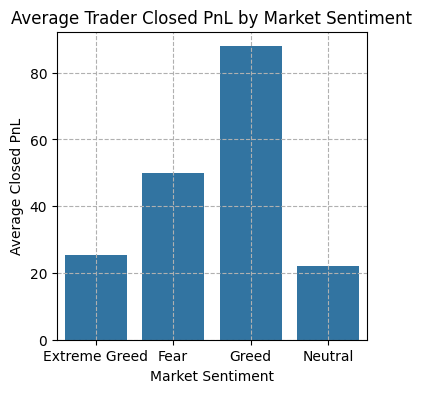

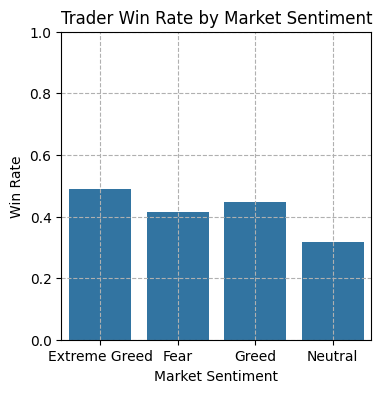

In [30]:
# Calculate profitability (win rate) and avg trade size by sentiment and side
merged['profitable'] = merged['closed_pnl'] > 0

# Group by sentiment classification and aggregate performance metrics
performance_summary = merged.groupby('classification').agg(
    avg_pnl=('closed_pnl', 'mean'),
    median_pnl=('closed_pnl', 'median'),
    win_rate=('profitable', 'mean'),
    trade_count=('closed_pnl', 'count')
).reset_index()

# Show summary stats rounded for clarity
print(performance_summary.round(3))

# Plot average closed PnL by sentiment
plt.figure(figsize=(4,4))
sns.barplot(data=performance_summary, x='classification', y='avg_pnl')
plt.title('Average Trader Closed PnL by Market Sentiment')
plt.ylabel('Average Closed PnL')
plt.xlabel('Market Sentiment')
plt.grid(True, linestyle='--')
plt.savefig('Average_pnl.png',dpi = 300, bbox_inches = 'tight')
plt.show()

# Plot win rate by sentiment
plt.figure(figsize=(4,4))
sns.barplot(data=performance_summary, x='classification', y='win_rate')
plt.title('Trader Win Rate by Market Sentiment')
plt.ylabel('Win Rate')
plt.xlabel('Market Sentiment')
plt.ylim(0, 1)
plt.grid(True, linestyle='--')
plt.savefig('Win_rate.png',dpi = 300, bbox_inches = 'tight')
plt.show()
# this show the avergae PnL and win rate by sentiment analysis.

Greed sentiment gives the best profits, even with a slightly lower win rate, suggesting fewer but more profitable traders.
Extreme greed has the highest win rate, but not the highest profit, possibly due to smaller trade sizes or more cautious behavior.
Neutral market prform worst in both profit and win rate, likely indicating uncertainty or low confidence among traders.

  classification  avg_trade_size  median_trade_size  trade_count
0  Extreme Greed        5660.266           1148.635         6962
1           Fear        5259.978            605.070       133871
2          Greed        3182.884            499.940        36289
3        Neutral        3058.848            554.160         7141


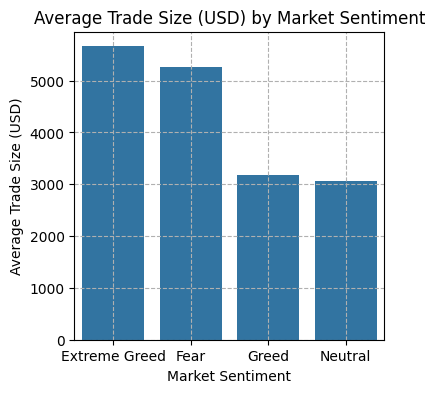

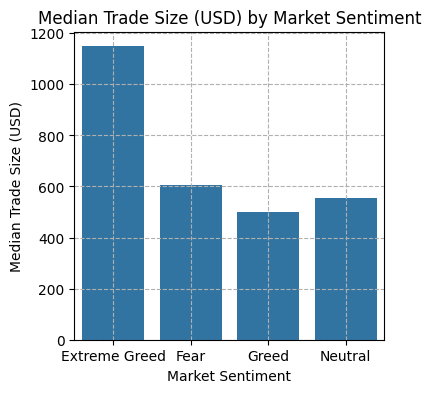

In [31]:
# Group by sentiment and summarize trade size
risk_appetite_summary = merged.groupby('classification').agg(
    avg_trade_size=('size_usd', 'mean'),
    median_trade_size=('size_usd', 'median'),
    trade_count=('size_usd', 'count')
).reset_index()

print(risk_appetite_summary.round(3))

# Plot average trade size by sentiment
plt.figure(figsize=(4,4))
sns.barplot(data=risk_appetite_summary, x='classification', y='avg_trade_size')
plt.title('Average Trade Size (USD) by Market Sentiment')
plt.ylabel('Average Trade Size (USD)')
plt.xlabel('Market Sentiment')
plt.grid(True, linestyle='--')
plt.savefig('Average_trade_size.png',dpi = 300, bbox_inches = 'tight')
plt.show()

# Plot median trade size by sentiment
plt.figure(figsize=(4,4))
sns.barplot(data=risk_appetite_summary, x='classification', y='median_trade_size')
plt.title('Median Trade Size (USD) by Market Sentiment')
plt.ylabel('Median Trade Size (USD)')
plt.xlabel('Market Sentiment')
plt.grid(True, linestyle='--')
plt.savefig('Median_trade_size.png',dpi = 300, bbox_inches = 'tight')
plt.show()

Extreme greed shows both high average and median trade sizes,indicating a general tendancy toward larger trades by most traders.
Fear shows a high average but lower median. This gap implies that a few large trades are inflating the average, while the majority of traders reamin relatively small.
In contrasr, Greed and Neutral sentiments are associated with smaller trade sizes, both on average and median. This reflects a more cautious or balanced trading approch, likely due to reduced market volatility ot overconfidence leading to smaller, feaquent trades.

  classification  side  avg_trade_size  median_trade_size  win_rate  \
0  Extreme Greed   BUY        5807.861            1077.18     0.457   
1  Extreme Greed  SELL        5521.713            1198.92     0.521   
2           Fear   BUY        5353.668             597.59     0.261   
3           Fear  SELL        5168.650             608.80     0.565   
4          Greed   BUY        3640.694             677.97     0.221   
5          Greed  SELL        2844.572             416.15     0.613   
6        Neutral   BUY        3111.187             553.01     0.391   
7        Neutral  SELL        3008.395             554.20     0.246   

   trade_count  
0         3371  
1         3591  
2        66081  
3        67790  
4        15421  
5        20868  
6         3505  
7         3636  


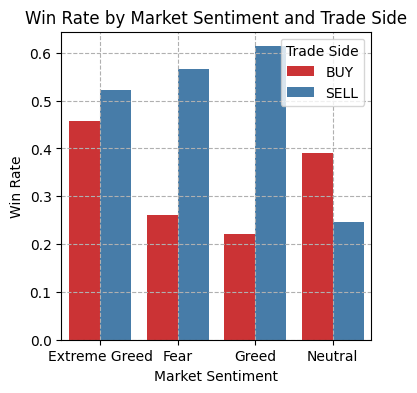

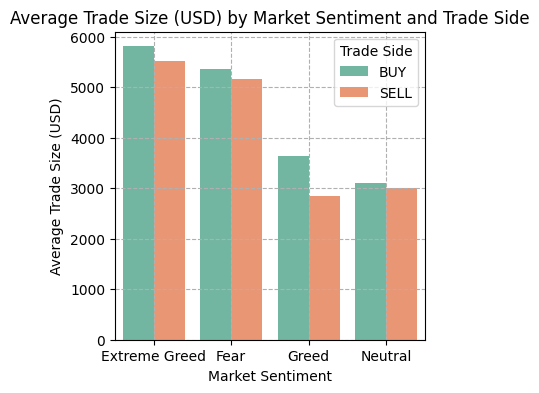

In [32]:
side_behavior = merged.groupby(['classification', 'side']).agg(
    avg_trade_size=('size_usd', 'mean'),
    median_trade_size=('size_usd', 'median'),
    win_rate=('profitable', 'mean'),
    trade_count=('size_usd', 'count')
).reset_index()

print(side_behavior.round(3))

# Plot win rate by sentiment and trade side
plt.figure(figsize=(4,4))
sns.barplot(data=side_behavior, x='classification', y='win_rate', hue='side', palette='Set1')
plt.title('Win Rate by Market Sentiment and Trade Side')
plt.ylabel('Win Rate')
plt.xlabel('Market Sentiment')
plt.legend(title='Trade Side')
plt.grid(True, linestyle='--')
plt.savefig('Win_rate_trade_side.png',dpi = 300, bbox_inches = 'tight')
plt.show()

# Plot average trade size by sentiment and trade side
plt.figure(figsize=(4,4))
sns.barplot(data=side_behavior, x='classification', y='avg_trade_size', hue='side', palette='Set2')
plt.title('Average Trade Size (USD) by Market Sentiment and Trade Side')
plt.ylabel('Average Trade Size (USD)')
plt.xlabel('Market Sentiment')
plt.legend(title='Trade Side')
plt.grid(True, linestyle='--')
plt.savefig('Average_trade_side_.png',dpi = 300, bbox_inches = 'tight')
plt.show()

SELL traders outperform BUY traders in emotional market conditionns like Fear and Greed, showing higher win rates.
BUY traders perform better in neutral markets, where sentiment is stable.
Overall, SELL strategy is more successful during volatile sentiments, while BUY works better in calm, neutral conditions.

    coin classification     avg_pnl  median_pnl  avg_trade_size  trade_count
0     @1           Fear    0.119853    0.000000       66.085556            9
1     @1          Greed   19.826702    0.000000      122.676800           25
2    @10        Neutral   -0.015871    0.000000        9.327500            4
3   @100          Greed    6.906785    3.251495       10.667500            4
4   @103           Fear    0.000000    0.000000        0.000000            1
5   @103          Greed    6.426339    7.231177        6.666667            6
6   @107           Fear   13.835667    0.000000     1724.159277        13698
7   @107          Greed  189.038983    0.633446     2204.522414        13687
8   @109           Fear  299.250918  423.702974      312.942222           18
9   @109          Greed   13.783810   13.783810       18.850000            2
10   @11        Neutral    0.000000    0.000000        0.610000            1
11  @112           Fear    0.000000    0.000000        0.000000            1

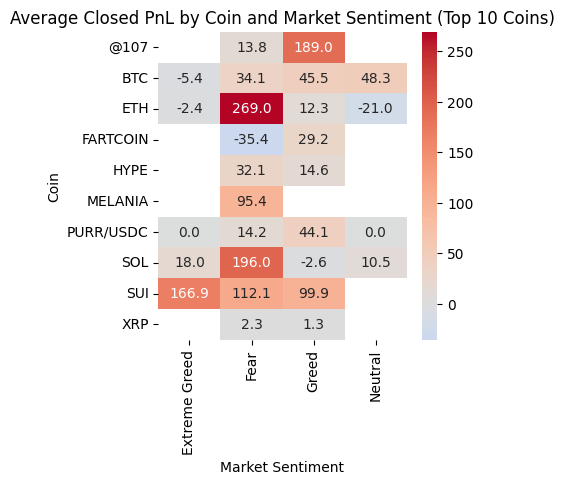

In [33]:
# Calculate average PnL and average trade size by coin and sentiment
coin_sensitivity = merged.groupby(['coin', 'classification']).agg(
    avg_pnl=('closed_pnl', 'mean'),
    median_pnl=('closed_pnl', 'median'),
    avg_trade_size=('size_usd', 'mean'),
    trade_count=('closed_pnl', 'count')
).reset_index()

print(coin_sensitivity.head(20))  # View a sample

# Optional: Plot heatmap of avg_pnl for top coins and sentiments

# Select top coins by total trades
top_coins = merged['coin'].value_counts().nlargest(10).index.tolist()
coin_top = coin_sensitivity[coin_sensitivity['coin'].isin(top_coins)]

# Pivot table for heatmap: coins vs sentiments, values=avg_pnl
pivot_pnl = coin_top.pivot(index='coin', columns='classification', values='avg_pnl')

plt.figure(figsize=(4,4))
sns.heatmap(pivot_pnl, annot=True, fmt=".1f", cmap='coolwarm', center=0)
plt.title('Average Closed PnL by Coin and Market Sentiment (Top 10 Coins)')
plt.ylabel('Coin')
plt.xlabel('Market Sentiment')
plt.savefig('Average_pnl_coin.png',dpi = 300, bbox_inches = 'tight')
plt.show()

Coins like ETH, SUI, and SOL are more profitable under bearish conditions.
SUI is consistently profitable, making it a potentially strong coin regardless of market sentiment.
Market sentiment strongly influences PnL, so trading strategies should consider corrent sentiment.

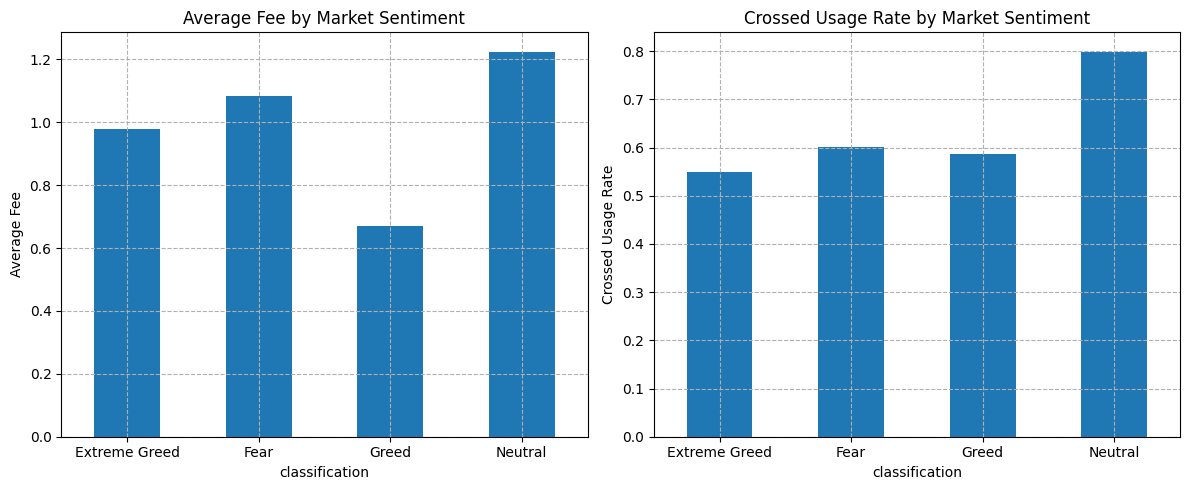

In [34]:
# Calculate average fee by sentiment
avg_fee_by_sentiment = merged.groupby('classification')['fee'].mean()

# Calculate crossed usage rate by sentiment
crossed_usage_by_sentiment = merged.groupby('classification')['crossed'].mean()

# Plot Average Fee
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
avg_fee_by_sentiment.plot(kind='bar')
plt.title('Average Fee by Market Sentiment')
plt.ylabel('Average Fee')
plt.grid(True, linestyle='--')
plt.xticks(rotation=0)

# Plot Crossed Usage Rate
plt.subplot(1, 2, 2)
crossed_usage_by_sentiment.plot(kind='bar')
plt.title('Crossed Usage Rate by Market Sentiment')
plt.ylabel('Crossed Usage Rate')
plt.grid(True, linestyle='--')
plt.xticks(rotation=0)

plt.tight_layout()
plt.savefig('Average_fee_crossed.png',dpi = 300, bbox_inches = 'tight')
plt.show()

In [35]:
avg_fee_by_sentiment = merged.groupby('classification')['fee'].mean()
print("Average Fee Paid:")
print(avg_fee_by_sentiment)

Average Fee Paid:
classification
Extreme Greed    0.978567
Fear             1.083267
Greed            0.670562
Neutral          1.224461
Name: fee, dtype: float64


Greed periods may offer more stable, cost-efficient trading environments.

High fees in Neutral/Fear imply you should monitor trading cost efficiency, especially in uncertain or bearish markets.

In [36]:
crossed_usage_by_sentiment = merged.groupby('classification')['crossed'].mean()
print("Crossed Usage Rate:")
print(crossed_usage_by_sentiment)

Crossed Usage Rate:
classification
Extreme Greed    0.550129
Fear             0.600675
Greed            0.587561
Neutral          0.799048
Name: crossed, dtype: float64



The highest crossed usage is during Neutral sentiment (~80%), indicating traders take the most risk or use cross margin more in neutral markets.

Crossed usage is lowest in Extreme Greed (~55%), suggesting slightly more conservative or isolated margin usage during very bullish periods.

Fairly similar rates for Fear and Greed (~60%), showing consistent risk-taking regardless of market optimism or pessimism.

In [37]:
from scipy.stats import f_oneway, kruskal, chi2_contingency

# Extract PnL and trade size groups for each classification
groups_pnl = [merged[merged['classification'] == c]['closed_pnl'] for c in merged['classification'].unique()]
groups_size = [merged[merged['classification'] == c]['size_usd'] for c in merged['classification'].unique()]

# 1. ANOVA test for net_pnl across all 4 sentiments
anova_stat_pnl, anova_pval_pnl = f_oneway(*groups_pnl)
print(f"ANOVA for closed_pnl: stat={anova_stat_pnl:.3f}, p-value={anova_pval_pnl:.3f}")

# If data is not normally distributed, use Kruskal-Wallis (non-parametric)
kruskal_stat_pnl, kruskal_pval_pnl = kruskal(*groups_pnl)
print(f"Kruskal-Wallis for closed_pnl: stat={kruskal_stat_pnl:.3f}, p-value={kruskal_pval_pnl:.3f}")
print('-----------------')
# 2. ANOVA test for size_usd
anova_stat_size, anova_pval_size = f_oneway(*groups_size)
print(f"ANOVA for size_usd: stat={anova_stat_size:.3f}, p-value={anova_pval_size:.3f}")

# Kruskal-Wallis for size_usd
kruskal_stat_size, kruskal_pval_size = kruskal(*groups_size)
print(f"Kruskal-Wallis for size_usd: stat={kruskal_stat_size:.3f}, p-value={kruskal_pval_size:.3f}")
print('----------------')
# 3. Chi-Squared test for direction vs classification
contingency_table = pd.crosstab(merged['direction'], merged['classification'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-squared test for direction vs classification: chi2={chi2:.3f}, p-value={p:.3f}")
print()
print("Contingency Table:")
print()
print(contingency_table)

ANOVA for closed_pnl: stat=21.330, p-value=0.000
Kruskal-Wallis for closed_pnl: stat=386.548, p-value=0.000
-----------------
ANOVA for size_usd: stat=69.132, p-value=0.000
Kruskal-Wallis for size_usd: stat=1090.696, p-value=0.000
----------------
Chi-squared test for direction vs classification: chi2=27076.311, p-value=0.000

Contingency Table:

classification        Extreme Greed   Fear  Greed  Neutral
direction                                                 
Auto-Deleveraging                 0      0      0        8
Buy                              88   7977   5806      786
Close Long                     2389  36555   5105      886
Close Short                    1931  20232   4129     1799
Long > Short                     13     36      5        0
Open Long                      1339  37828   5479      918
Open Short                     1114  23472   5886     2389
Sell                             75   7687   9833      295
Settlement                        0      1      0        0
Sh


Trader performance (closed PnL) and trade sizes vary significantly across market sentiment states (Fear, Greed, Extreme Greed, Neutral), as shown by highly significant ANOVA and Kruskal-Wallis tests (p < 0.001).

There is a strong association between trade direction and market sentiment (Chi-squared test p < 0.001), indicating traders adjust their strategies depending on the sentiment.

For example, during Fear, traders tend to open and close long positions heavily, while in Neutral sentiment, opening and closing short positions dominate.

This suggests market sentiment strongly influences trading behavior and outcomes, highlighting opportunities to tailor strategies based on prevailing sentiment.

#  proportions within each sentiment

In [38]:
prop_table = contingency_table.div(contingency_table.sum(axis=0), axis=1) * 100
print(prop_table.round(2))

classification        Extreme Greed   Fear  Greed  Neutral
direction                                                 
Auto-Deleveraging              0.00   0.00   0.00     0.11
Buy                            1.26   5.96  16.00    11.01
Close Long                    34.31  27.31  14.07    12.41
Close Short                   27.74  15.11  11.38    25.19
Long > Short                   0.19   0.03   0.01     0.00
Open Long                     19.23  28.26  15.10    12.86
Open Short                    16.00  17.53  16.22    33.45
Sell                           1.08   5.74  27.10     4.13
Settlement                     0.00   0.00   0.00     0.00
Short > Long                   0.19   0.03   0.02     0.03
Spot Dust Conversion           0.00   0.03   0.11     0.81



Extreme Greed:
Mostly closing longs (34%) and closing shorts (28%), with opening longs (19%) and opening shorts (16%) still active-likely profit-taking and position management.

Fear:
High activity in opening longs (28%) and closing longs (27%), reflecting traders reacting to fear by possibly entering or exiting long positions rapidly.

Greed:
Heavy on selling (27%) and buying (16%), showing active trade both ways, plus balanced open long/short trades (~15-16%).

Neutral:
Dominated by opening shorts (33%) and closing shorts (25%), indicating more bearish or hedging activity.

### Final Conclusion
This analysis explores the intricate relationship between market sentiment and trader performance, uncovering key behavioral patterns that provide actionable insights for smarter, sentiment-driven trading strategies.

🔍 1. Market Sentiment Strongly Influences Performance

Greed sentiment produces the highest overall profits, despite slightly lower win rates. This suggests that fewer but more lucrative trades dominate, pointing to a high-reward environment.

Extreme Greed yields the highest win rates, yet with lower overall profits—likely due to profit-taking and more cautious trade sizing.

Neutral sentiment is the least favorable, showing the lowest profitability and win rates. This indicates trader uncertainty and ineffective strategies under unclear market direction.

📊 2. Trade Size Patterns Reveal Hidden Behaviors

Extreme Greed sees both high average and median trade sizes, showing widespread confidence and aggressive positioning.

Fear sentiment displays a high average but low median trade size, revealing that while a few traders take large positions, most remain conservative—indicating mixed confidence.

Greed and Neutral are characterized by smaller, more frequent trades, reflecting either cautious risk management or low market volatility.

🔁 3. Trade Direction Adapts to Sentiment

A strong association exists between sentiment and trade direction (Chi-squared test, p < 0.001).

SELL trades outperform BUY trades during emotional conditions (Fear and Greed), suggesting traders capitalize better on downside volatility.

BUY trades are more successful in Neutral markets, where stability favors long positions.

📈 4. Coin Performance and Strategy Optimization

Coins like SUI, ETH, and SOL perform better under bearish conditions.

SUI is consistently profitable across all sentiments—making it a strong candidate for sentiment-independent strategies.

These asset-specific patterns suggest the importance of pairing asset selection with sentiment-based timing.

💡 5. Risk Behavior and Margin Usage

Cross margin usage peaks during Neutral sentiment (~80%), indicating higher risk-taking despite low performance-an inefficiency traders should address.

It drops during Extreme Greed (~55%), showing more isolated, cautious risk management during overly bullish phases.

Trading fees are highest in Neutral and Fear, underlining the need to monitor cost-efficiency in less favorable market conditions.

🎯 Strategic Insight
By aligning trading decisions with prevailing market sentiment, traders can significantly improve both profitability and risk control. The data reveals clear behavioral patterns and strategy shifts that correlate with emotional market states-providing a roadmap for:

Adjusting trade direction and position sizing based on sentiment
Choosing optimal trading periods and assets (e.g., focusing on SUI in any condition)
Monitoring margin usage and fees for cost-effective execution

In summary, smarter trading strategies emerge when sentiment is not just observed-but integrated into decision-making.